In [106]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [107]:
def generate_linear(n=100):
    
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0]-pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

def generat_XOR_easy():
    import numpy as np
    inputs = []
    labels = []

    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)

        if 0.1* i == 0.5:
            continue

        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
    
    return np.array(inputs), np.array(labels).reshape(21, 1)
        

In [149]:
def show_result(x, y, pred_y):
    plt.subplot(1, 2, 1)
    plt.title('Ground Truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    
    plt.subplot(1, 2, 2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    
    plt.show()

In [ ]:
class Linear:
    def __init__(self, n_x, n_y):
        self.n_x = n_x
        self.n_y = n_y
        self.initialize_parameters()

    def initialize_parameters(self):
        # np.random.seed(1)
        # limit = math.sqrt(6/(self.n_x + self.n_y))
        # W = np.random.uniform(low=-limit, high=limit, size = (self.n_y, self.n_x))
        # b = np.zeros((self.n_y, 1))
        # self.W = W
        # self.b = b
        self.W = np.random.randn(self.n_y, self.n_x) * np.sqrt(2. / self.n_x)
        self.b = np.zeros((self.n_y, 1))

    def forward(self, A):
        Z = np.matmul(self.W, A) + self.b
        self.cache = (A, self.W, self.b)
        return Z

    def backward(self, dZ):
        A_prev, W, b = self.cache
        m = A_prev.shape[1]
        self.dW = (1 / m) * np.matmul(dZ, A_prev.T)
        self.db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.matmul(W.T, dZ)

        return dA_prev
    
    def update(self, learning_rate):
        self.W -= learning_rate * self.dW
        self.b -= learning_rate * self.db

In [114]:
class Activation():
    def __init__(self, function):
        self.function = function
    
    def forward(self, Z):
        if self.function == 'sigmoid':
            A = np.where(Z >= 0, 1 / (1 + np.exp(-Z)), np.exp(Z) / (1 + np.exp(Z)))
            self.cache = Z
            return A

        elif self.function == 'relu':
            A = np.where(Z >= 0, Z, 0)
            self.cache = Z
            return A
    
    def backward(self, dA=None, Y=None):
        if self.function == 'sigmoid':
            Z = self.cache
            dg = self.forward(Z) * (1 - self.forward(Z))
            dZ = dA * dg
            return dZ

        elif self.function == 'relu':
            Z = self.cache
            dZ = np.array(dA, copy=True)
            dZ[Z <= 0] = 0
            return dZ


In [117]:
class Model():
    def __init__(self, units, activation_functions):
        self.units = units
        self.activation_functions = activation_functions
        self.initialize_parameters()

    def initialize_parameters(self):
        self.linear = []
        self.activation = []
        for i in self.activation_functions:
            self.activation.append(Activation(i))
        for i in range(len(self.units)-1):
            self.linear.append(Linear(self.units[i], self.units[i+1]))
    
    def forward(self, X):
        A = X
        for i in range(len(self.linear)):
            A = self.linear[i].forward(A)
            A = self.activation[i].forward(A)
        return A
    
    def backward(self, AL=None, Y=None):
        L = len(self.linear)

        if self.activation_functions[-1] == "sigmoid":
            epsilon = 0.00001
            dAL = -(np.divide(Y, AL + epsilon) - np.divide(1 - Y, 1 - AL + epsilon))
            dZ = self.activation[-1].backward(dAL, Y)
            
            dA_prev = self.linear[-1].backward(dZ)
        else:
            dZ = self.activation[-1].backward(None, Y)

            dA_prev = self.linear[-1].backward(dZ)

        for  l in range(L-2, -1, -1):
            dZ = self.activation[l].backward(dA_prev, Y)
            dA_prev = self.linear[l].backward(dZ)

        return dA_prev
    
    def update(self, learning_rate):
        L = len(self.linear)
        for i in range(L-1, -1, -1):
            self.linear[i].update(learning_rate)

In [120]:
def compute_BCE_cost(AL, Y):
    m = Y.shape[1]

    cost = -(1/m) * np.sum(Y * np.log(AL + 0.00001) + (1 - Y) * np.log(1 - AL + 0.00001))
    
    cost = np.squeeze(cost)
    
    return cost

In [121]:
X1, y1 = generate_linear(n=100)
print(X1.shape, y1.shape)
X2, y2 =  generat_XOR_easy()
print(X2.shape, y2.shape)

(100, 2) (100, 1)
(21, 2) (21, 1)


In [122]:
indices = np.random.permutation(X1.shape[0])

In [123]:
X1 = X1[indices]
y1 = y1[indices]
X1_train, y1_train = X1[:80, :].T, y1[:80, :].T
X1_test, y1_test = X1[80:, :].T, y1[80:, :].T
print(X1_test.shape, y1_test.shape)

(2, 20) (1, 20)


In [124]:
model = Model([2, 3, 3, 1], ["sigmoid", "sigmoid", "sigmoid"])
learning_rate = 0.75
num_iterations = 5000
classes = 2
costs = []                         # keep track of cost

for i in range(0, num_iterations):
    # forward
    AL = model.forward(X1_train)

    cost = (compute_BCE_cost(AL, y1_train))


    # backward
    dA_prev = model.backward(AL, y1_train)
    
    # update
    model.update(learning_rate)

    if i % 100 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))
        costs.append(cost)


Cost after iteration 0: 0.695293
Cost after iteration 100: 0.565699
Cost after iteration 200: 0.177432
Cost after iteration 300: 0.095160
Cost after iteration 400: 0.069517
Cost after iteration 500: 0.057126
Cost after iteration 600: 0.049734


Cost after iteration 700: 0.044773
Cost after iteration 800: 0.041191
Cost after iteration 900: 0.038476
Cost after iteration 1000: 0.036345
Cost after iteration 1100: 0.034629
Cost after iteration 1200: 0.033218
Cost after iteration 1300: 0.032040
Cost after iteration 1400: 0.031042
Cost after iteration 1500: 0.030188
Cost after iteration 1600: 0.029448
Cost after iteration 1700: 0.028803
Cost after iteration 1800: 0.028234
Cost after iteration 1900: 0.027730
Cost after iteration 2000: 0.027280
Cost after iteration 2100: 0.026875
Cost after iteration 2200: 0.026507
Cost after iteration 2300: 0.026172
Cost after iteration 2400: 0.025862
Cost after iteration 2500: 0.025574
Cost after iteration 2600: 0.025303
Cost after iteration 2700: 0.025042
Cost after iteration 2800: 0.024785
Cost after iteration 2900: 0.024525
Cost after iteration 3000: 0.024249
Cost after iteration 3100: 0.023942
Cost after iteration 3200: 0.023584
Cost after iteration 3300: 0.023151
Cost after iteration 3400: 0.02

In [125]:
def predict(X, y, model): 
    m = X.shape[1]
    n = len(model.linear)

    p = np.zeros((1,m))

    
    probas = model.forward(X)
    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    #print results
    if y is not None:
        print("Accuracy: "  + str(np.sum((p == y)/m)))

        
    return p

In [132]:
pred_train = predict(X1_test, y1_test, model)

Accuracy: 1.0000000000000002


In [134]:
pred_train = pred_train.reshape(20,)
y1_test = y1_test.reshape(20,)
pred_train.shape

(20,)

In [141]:
X1_test.shape, y1_test.shape, pred_train.shape

((2, 20), (20,), (20,))

In [148]:
X1_test.T.shape, X1_test.T

((20, 2),
 array([[0.96959575, 0.56103022],
        [0.77217803, 0.90781585],
        [0.38786064, 0.86354185],
        [0.6280762 , 0.28557628],
        [0.23702698, 0.90337952],
        [0.72599799, 0.88330609],
        [0.13713575, 0.93259546],
        [0.62169572, 0.11474597],
        [0.13645523, 0.05991769],
        [0.61714491, 0.3266449 ],
        [0.82884581, 0.5747115 ],
        [0.99732285, 0.17234051],
        [0.12427096, 0.01988013],
        [0.96727633, 0.56810046],
        [0.06653648, 0.2603151 ],
        [0.94797021, 0.82711547],
        [0.80949069, 0.34473665],
        [0.24621107, 0.86002795],
        [0.69805725, 0.86447943],
        [0.1374747 , 0.13927635]]))

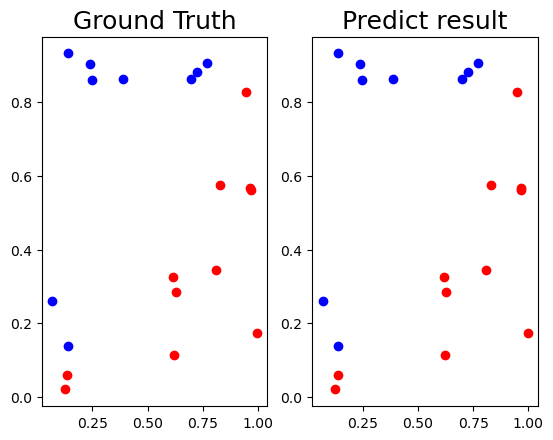

In [150]:
show_result(X1_test.T, y1_test, pred_train)